Import all the necessary modules.

In [41]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

# Data Understanding

In [43]:
data = pd.read_csv('/content/drive/MyDrive/garments_worker_productivity.csv')  
print(data.head())

       date   quarter  ... no_of_workers actual_productivity
0  1/1/2015  Quarter1  ...          59.0            0.940725
1  1/1/2015  Quarter1  ...           8.0            0.886500
2  1/1/2015  Quarter1  ...          30.5            0.800570
3  1/1/2015  Quarter1  ...          30.5            0.800570
4  1/1/2015  Quarter1  ...          56.0            0.800382

[5 rows x 15 columns]


In [44]:
data.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [45]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
team,1197.0,6.426901,3.463963,1.000000,3.000000,6.000000,9.000000,12.000000
targeted_productivity,1197.0,0.729632,0.097891,0.070000,0.700000,0.750000,0.800000,0.800000
smv,1197.0,15.062172,10.943219,2.900000,3.940000,15.260000,24.260000,54.560000
wip,691.0,1190.465991,1837.455001,7.000000,774.500000,1039.000000,1252.500000,23122.000000
over_time,1197.0,4567.460317,3348.823563,0.000000,1440.000000,3960.000000,6960.000000,25920.000000
incentive,1197.0,38.210526,160.182643,0.000000,0.000000,0.000000,50.000000,3600.000000
idle_time,1197.0,0.730159,12.709757,0.000000,0.000000,0.000000,0.000000,300.000000
idle_men,1197.0,0.369256,3.268987,0.000000,0.000000,0.000000,0.000000,45.000000
no_of_style_change,1197.0,0.150376,0.427848,0.000000,0.000000,0.000000,0.000000,2.000000
no_of_workers,1197.0,34.609858,22.197687,2.000000,9.000000,34.000000,57.000000,89.000000


In [46]:
data.skew(axis = 0, skipna = True)

team                      0.009848
targeted_productivity    -2.144150
smv                       0.405937
wip                       9.741786
over_time                 0.673287
incentive                15.790746
idle_time                20.545425
idle_men                  9.855079
no_of_style_change        2.942506
no_of_workers            -0.111740
actual_productivity      -0.807492
dtype: float64

Actual productivity has a maximum value higher than 1. Let's explore this further.

In [47]:
data.loc[(data['actual_productivity'] >= 1)]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
337,1/20/2015,Quarter3,finishing,Tuesday,5,0.70,4.15,NaN,1440,0,0.0,0,0,8.0,1.033570
437,1/26/2015,Quarter4,finishing,Monday,3,0.75,3.94,NaN,1800,0,0.0,0,0,10.0,1.059621
456,1/27/2015,Quarter4,sweing,Tuesday,2,0.75,22.52,1635.0,6840,119,0.0,0,0,57.0,1.000230
457,1/27/2015,Quarter4,sweing,Tuesday,3,0.75,22.52,1299.0,6840,119,0.0,0,0,57.0,1.000230
477,1/28/2015,Quarter4,sweing,Wednesday,2,0.80,22.52,1559.0,6840,90,0.0,0,0,57.0,1.000230
478,1/28/2015,Quarter4,sweing,Wednesday,3,0.80,22.52,1350.0,6840,113,0.0,0,0,57.0,1.000230
498,1/29/2015,Quarter5,sweing,Thursday,2,0.80,22.52,1416.0,6840,113,0.0,0,0,57.0,1.000230
518,1/31/2015,Quarter5,sweing,Saturday,3,0.80,22.52,1136.0,6960,113,0.0,0,0,58.0,1.000457
519,1/31/2015,Quarter5,sweing,Saturday,2,0.80,22.52,1397.0,6840,113,0.0,0,0,57.0,1.000230
542,2/1/2015,Quarter1,finishing,Sunday,8,0.65,4.15,NaN,960,0,0.0,0,0,8.0,1.011562


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5213dbf610>,
      dtype=object)

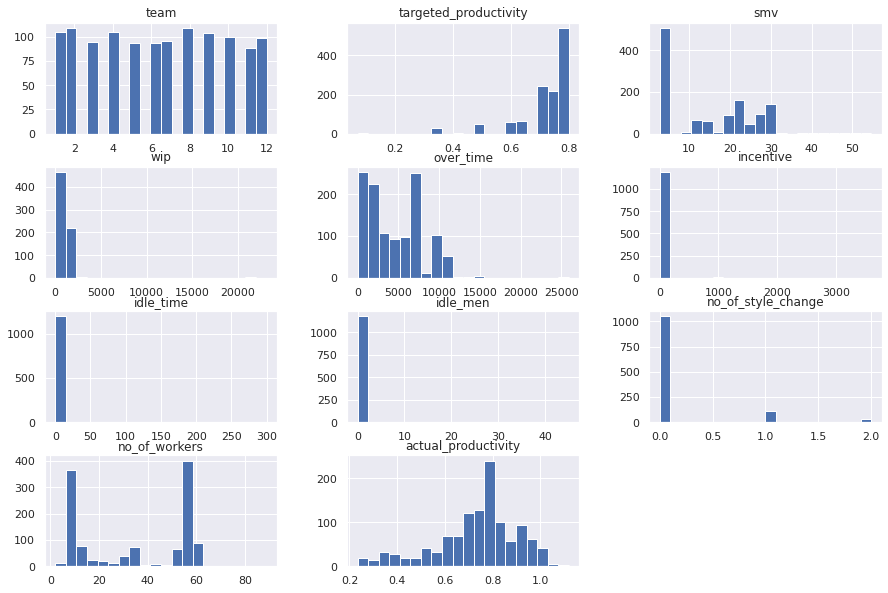

In [48]:
data.hist(bins=20, figsize=(15, 10))

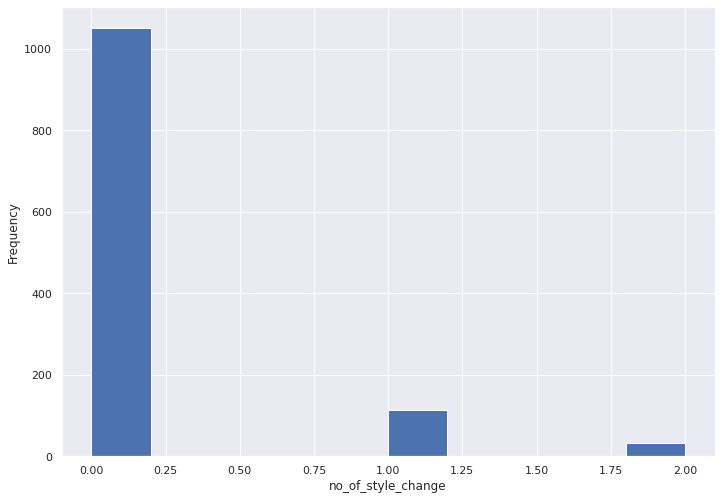

In [49]:
import matplotlib.pyplot as plt
ax = data['no_of_style_change'].plot(kind='hist')
ax.set_xlabel("no_of_style_change")
plt.savefig('histo_style.png')

Some data types need to be fixed.

In [50]:
data.dtypes

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

In [51]:
data["team"] = data['team'].astype('str')
data["over_time"] = data['over_time'].astype('float')
data["incentive"] = data['incentive'].astype('float')
data.dtypes

date                      object
quarter                   object
department                object
day                       object
team                      object
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                float64
incentive                float64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

Let's explore correlations.

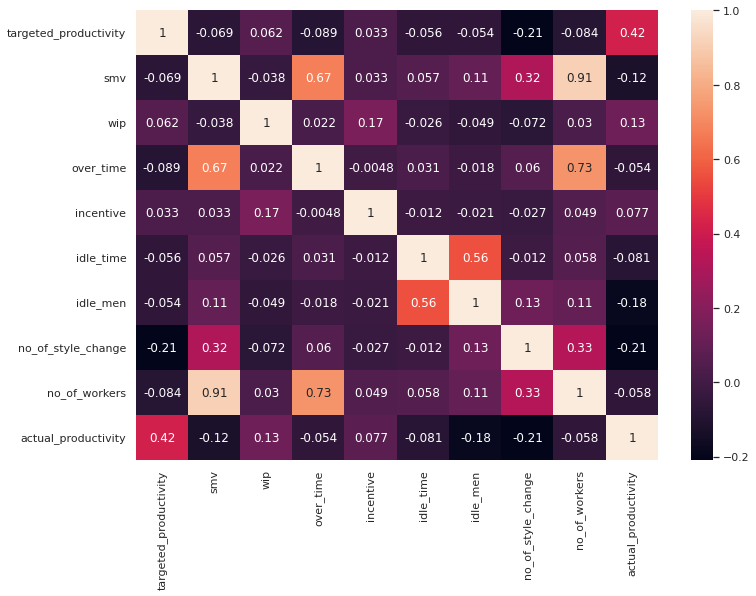

In [52]:
%matplotlib inline

# calculate the correlation matrix
corr = data.corr()
sns.set(rc={'figure.figsize':(11.7,8.27)})

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True)

plt.savefig('corr_matrix.png')

In [53]:
data.describe(include='object').T

,count,unique,top,freq
date,1197,59,3/11/2015,24
quarter,1197,5,Quarter1,360
department,1197,3,sweing,691
day,1197,6,Wednesday,208
team,1197,12,2,109


In [54]:
data.replace("finishing ", 
           "finishing", 
           inplace=True)
data.replace("sweing", 
           "sewing", 
           inplace=True)
data['department'].value_counts()

sewing       691
finishing    506
Name: department, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f521651f850>,
      dtype=object)

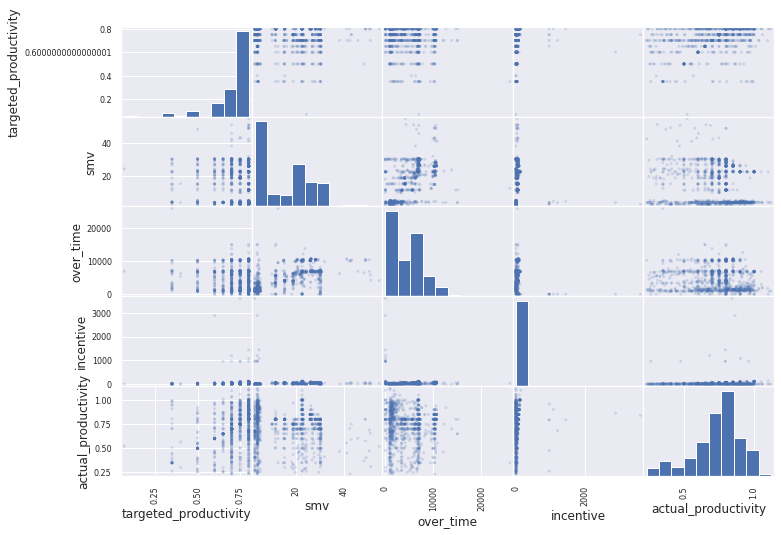

In [55]:
pd.plotting.scatter_matrix(data[["targeted_productivity", "smv", "over_time", "incentive", "actual_productivity"]], alpha=0.2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f520ada0bd0>,
      dtype=object)

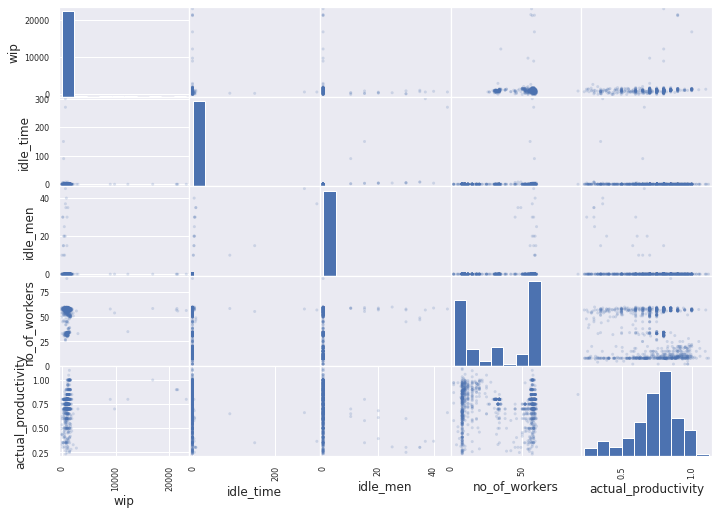

In [56]:
pd.plotting.scatter_matrix(data[["wip", "idle_time", "idle_men", "no_of_workers", "actual_productivity"]], alpha=0.2)

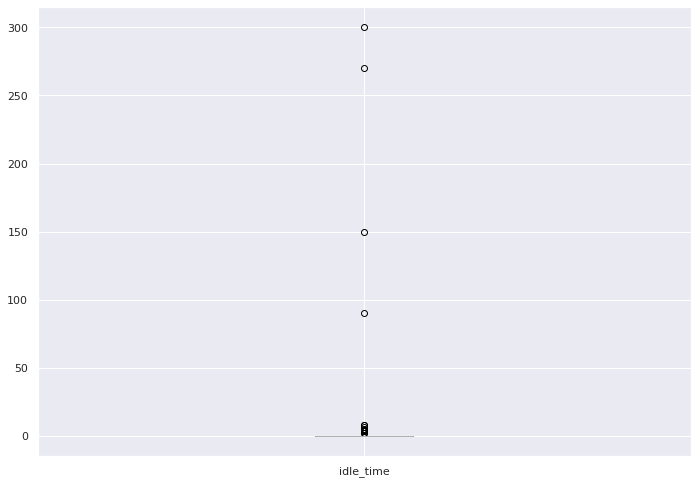

In [57]:
# explore with boxplots
data.boxplot(column=['idle_time'], return_type='axes')

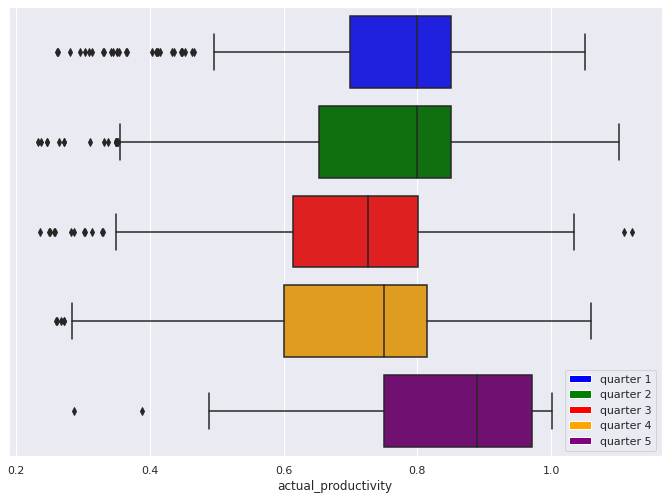

In [58]:
# quarter
from matplotlib.patches import Patch
fig, ax = plt.subplots()

sns.boxplot(x="actual_productivity", y="quarter", data=data, orient="h", palette={"Quarter1":"blue", "Quarter2":"green", "Quarter3":"red", "Quarter4":"orange", "Quarter5":"purple"}, ax=ax)

ax.get_yaxis().set_visible(False)

color_patches = [
    Patch(facecolor="blue", label="quarter 1"),
    Patch(facecolor="green", label="quarter 2"),
    Patch(facecolor="red", label="quarter 3"),
    Patch(facecolor="orange", label="quarter 4"),
    Patch(facecolor="purple", label="quarter 5")
]
ax.legend(handles=color_patches);

In [59]:
data.loc[(data['quarter'] == "Quarter5")]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
498,1/29/2015,Quarter5,sewing,Thursday,2,0.80,22.52,1416.0,6840.0,113.0,0.0,0,0,57.0,1.000230
499,1/29/2015,Quarter5,finishing,Thursday,4,0.80,4.30,NaN,1200.0,0.0,0.0,0,0,10.0,0.989000
500,1/29/2015,Quarter5,sewing,Thursday,3,0.80,22.52,1287.0,6840.0,100.0,0.0,0,0,57.0,0.950186
501,1/29/2015,Quarter5,sewing,Thursday,4,0.80,22.52,1444.0,6900.0,88.0,0.0,0,0,57.5,0.900800
502,1/29/2015,Quarter5,sewing,Thursday,10,0.80,22.52,1088.0,6720.0,88.0,0.0,0,0,56.0,0.900130
503,1/29/2015,Quarter5,finishing,Thursday,6,0.50,2.90,NaN,1200.0,0.0,0.0,0,0,10.0,0.899000
504,1/29/2015,Quarter5,finishing,Thursday,8,0.65,4.15,NaN,960.0,0.0,0.0,0,0,8.0,0.877552
505,1/29/2015,Quarter5,finishing,Thursday,11,0.60,2.90,NaN,960.0,0.0,0.0,0,0,8.0,0.864583
506,1/29/2015,Quarter5,finishing,Thursday,10,0.80,3.94,NaN,1200.0,0.0,0.0,0,0,10.0,0.856950
507,1/29/2015,Quarter5,finishing,Thursday,1,0.75,3.94,NaN,1200.0,0.0,0.0,0,0,10.0,0.853667


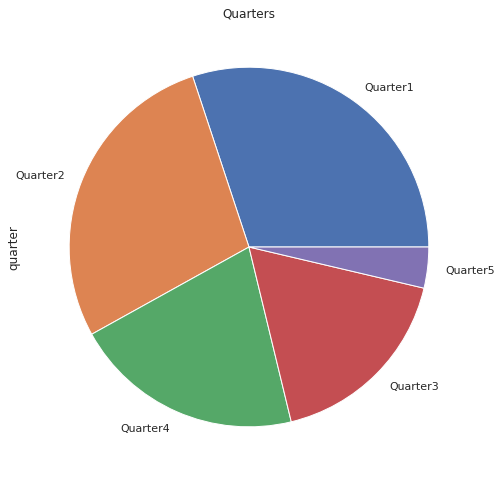

In [60]:
plt.title("Quarters")
data['quarter'].value_counts().plot(kind='pie')
plt.show()

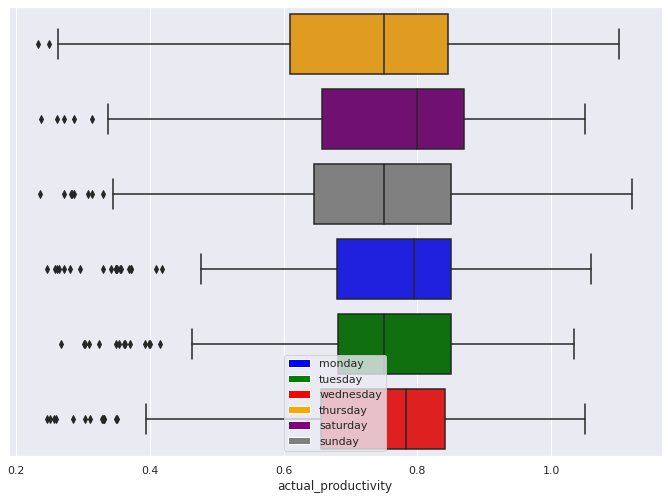

In [61]:
# day
from matplotlib.patches import Patch
fig, ax = plt.subplots()

sns.boxplot(x="actual_productivity", y="day", data=data, orient="h", palette={"Monday":"blue", "Tuesday":"green", "Wednesday":"red", "Thursday":"orange", "Saturday":"purple", "Sunday":"grey"}, ax=ax)

ax.get_yaxis().set_visible(False)

color_patches = [
    Patch(facecolor="blue", label="monday"),
    Patch(facecolor="green", label="tuesday"),
    Patch(facecolor="red", label="wednesday"),
    Patch(facecolor="orange", label="thursday"),
    Patch(facecolor="purple", label="saturday"),
    Patch(facecolor="grey", label="sunday")
]
ax.legend(handles=color_patches);

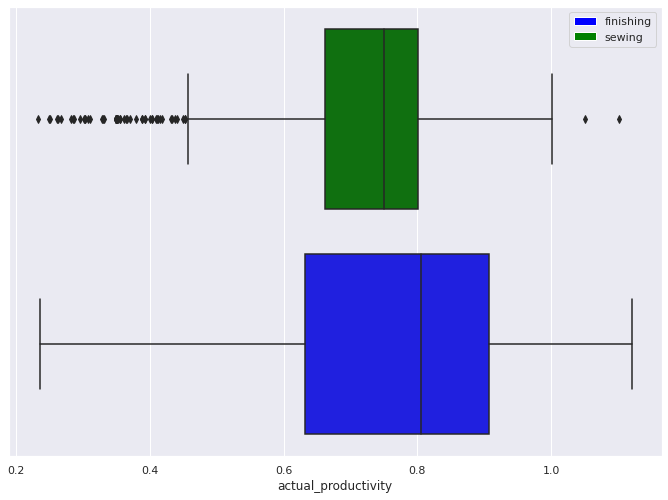

In [62]:
# department
from matplotlib.patches import Patch
fig, ax = plt.subplots()

sns.boxplot(x="actual_productivity", y="department", data=data, orient="h", palette={"finishing":"blue", "sewing":"green"}, ax=ax)

ax.get_yaxis().set_visible(False)

color_patches = [
    Patch(facecolor="blue", label="finishing"),
    Patch(facecolor="green", label="sewing")
]
ax.legend(handles=color_patches);

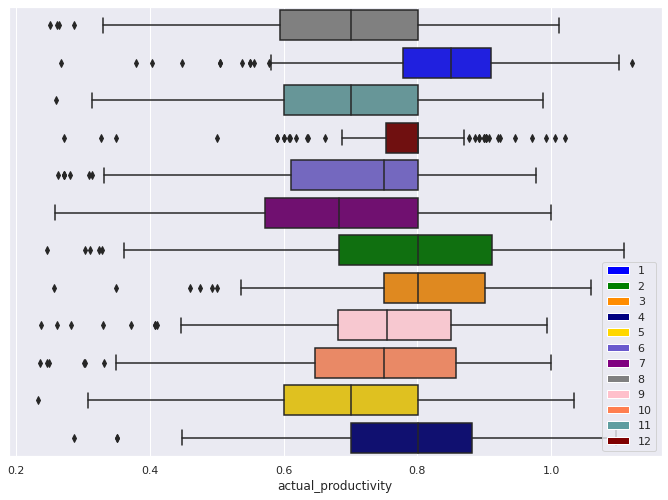

In [63]:
# team
from matplotlib.patches import Patch
fig, ax = plt.subplots()

sns.boxplot(x="actual_productivity", y="team", data=data, orient="h", palette={"1":"blue", "2":"green",
                                                                               "3":"darkorange", "4":"navy",
                                                                               "5":"gold", "6":"slateblue",
                                                                               "7":"purple", "8":"grey",
                                                                               "9":"pink", "10":"coral",
                                                                               "11":"cadetblue", "12":"maroon"},ax=ax)
color_patches = [
    Patch(facecolor="blue", label="1"),
    Patch(facecolor="green", label="2"),
    Patch(facecolor="darkorange", label="3"),
    Patch(facecolor="navy", label="4"),
    Patch(facecolor="gold", label="5"),
    Patch(facecolor="slateblue", label="6"),
    Patch(facecolor="purple", label="7"),
    Patch(facecolor="grey", label="8"),
    Patch(facecolor="pink", label="9"),
    Patch(facecolor="coral", label="10"),
    Patch(facecolor="cadetblue", label="11"),
    Patch(facecolor="maroon", label="12"),
]
ax.get_yaxis().set_visible(False)

ax.legend(handles=color_patches);

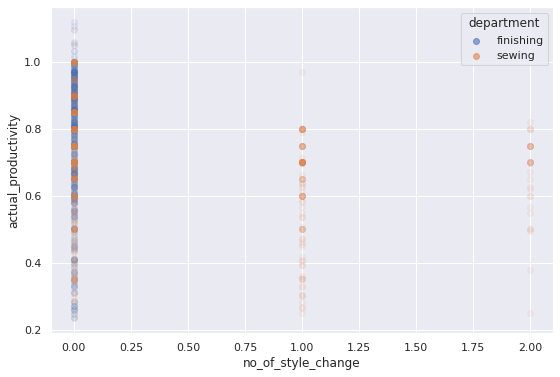

In [64]:
# style change
plt.figure(figsize = (9,6))
for name, group in data.groupby("department"):
    plt.scatter(x=group["no_of_style_change"], y=group["actual_productivity"], label=name, alpha=0.07)
plt.ylabel("actual_productivity")
plt.xlabel("no_of_style_change")
leg = plt.legend(title="department")
for lh in leg.legendHandles: 
    lh.set_alpha(0.6)
plt.show()

count    1197.000000
mean        0.735091
std         0.174488
min         0.233705
25%         0.650307
50%         0.773333
75%         0.850253
max         1.120437
Name: actual_productivity, dtype: float64


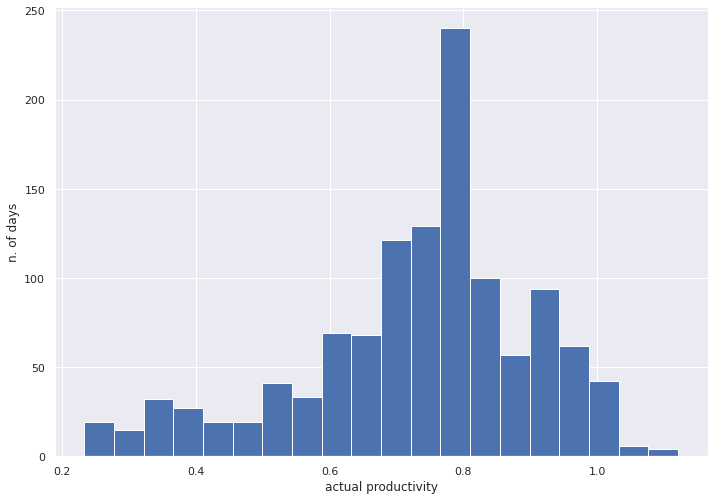

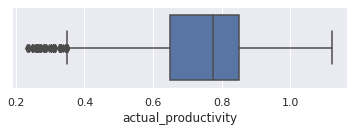

In [65]:
print(data.actual_productivity.describe())

import seaborn as sb

data.actual_productivity.hist(bins=20)
plt.xlabel("actual productivity")
plt.ylabel("n. of days")
plt.show()
plt.figure(figsize=(6,1.5))
sb.boxplot(data["actual_productivity"])
plt.show()

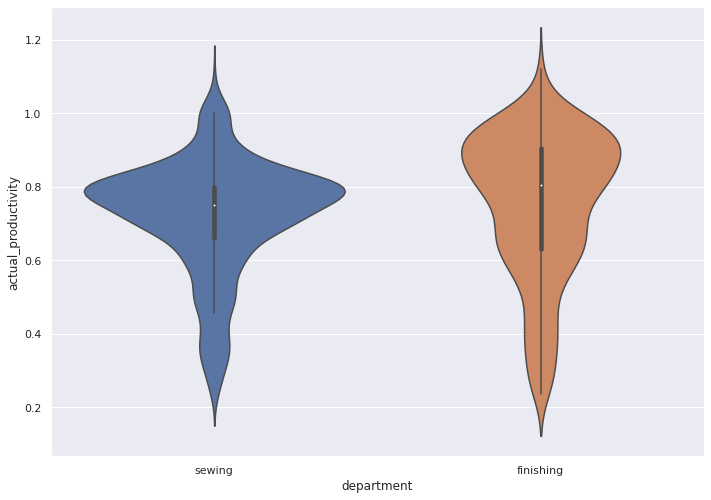

In [66]:
sb.violinplot(y="actual_productivity", x="department", data=data)
plt.show()

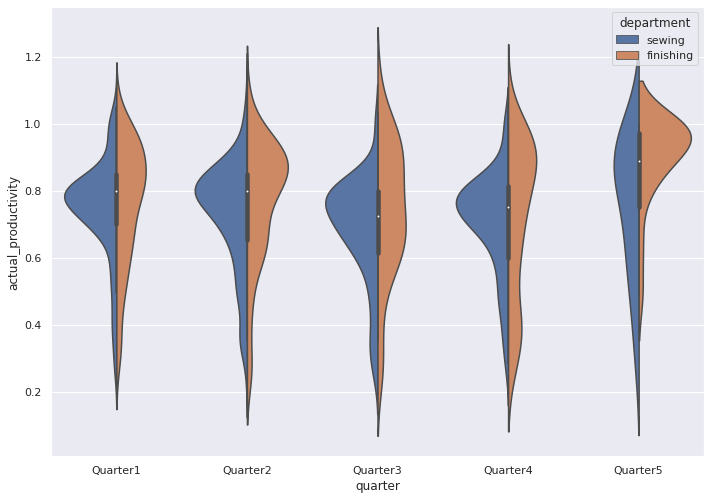

In [67]:
sb.violinplot(y="actual_productivity", x="quarter", hue="department", split=True, data=data)
plt.show()

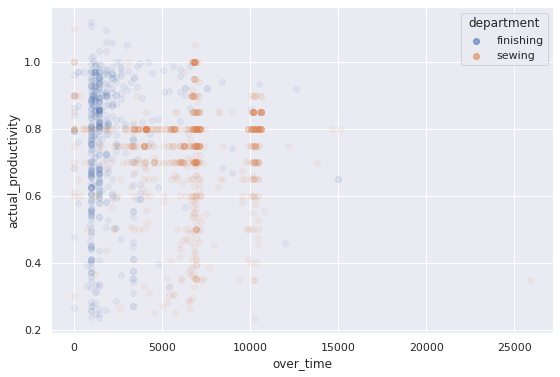

In [68]:
plt.figure(figsize = (9,6))
for name, group in data.groupby("department"):
    plt.scatter(x=group["over_time"], y=group["actual_productivity"], label=name, alpha=0.07)
plt.ylabel("actual_productivity")
plt.xlabel("over_time")
leg = plt.legend(title="department")
for lh in leg.legendHandles: 
    lh.set_alpha(0.6)
plt.show()

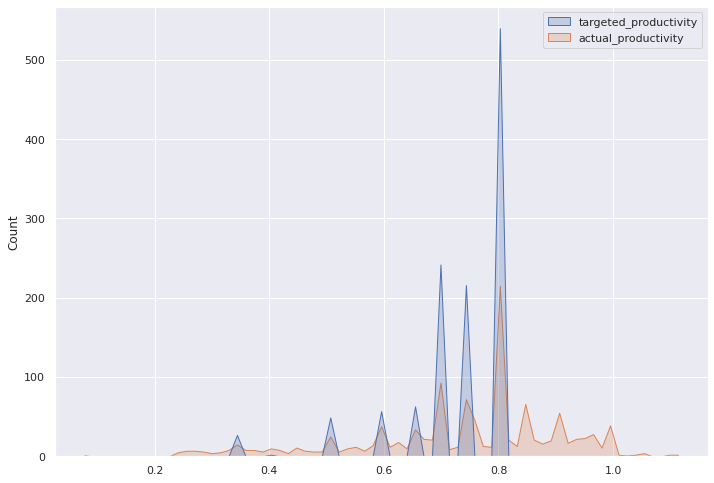

In [69]:
sns.histplot(data=data[['targeted_productivity', 'actual_productivity']], element='poly')
plt.show()

In [70]:
data.to_csv('garment_worker_productivity.csv', index=False)

# Pre-processing

In [71]:
def read_and_preprocess():
    df = pd.read_csv('/content/garment_worker_productivity.csv')

    # Checking values for department
    # print(df['department'].unique())
    # print(df['day'].unique())

    # Fixing values for department
    df['department'] = df['department'].apply(lambda x: 'finishing' if x == ('finishing ' or 'finishing') else 'sewing')
    # print(df['department'].unique())

    # Looking at the quarters
    # print(df.loc[df['quarter'] == 'Quarter1'])
    # print(df.loc[df['quarter'] == 'Quarter5'])

    # Checking means for missing values
    # print(df[df['wip'].isna()]['over_time'].mean())
    # print(df[df['wip'].notna()]['over_time'].mean())

    # print(df[df['wip'].isna()]['no_of_workers'].mean())
    # print(df[df['wip'].notna()]['no_of_workers'].mean())

    # creating column representing missing values
    missing_values = df['wip'].apply(lambda x: 1 if pd.isna(x) else 0)
    # adding column to df
    df['missing_wip'] = missing_values
    # print(df.info())

    # binning Quarter 4 and 5 together
    df['quarter'] = df['quarter'].apply(lambda x: 'Quarter4' if x == 'Quarter5' else x)
    # print(df['quarter'].unique())

    # Get one hot encoding of column 'departmnet'
    one_hot_department = pd.get_dummies(df['department'])
    # Drop column as it is now encoded
    df = df.drop('department', axis=1)
    # Join the encoded df
    df = df.join(one_hot_department)

    # Get one hot encoding of columns 'quarter'
    one_hot_quarters = pd.get_dummies(df['quarter'])
    # Drop column as it is now encoded
    df = df.drop('quarter', axis=1)
    # Join the encoded df
    df = df.join(one_hot_quarters)

    # Get one hot encoding of columns 'day'
    one_hot_day = pd.get_dummies(df['day'])
    # Drop column as it is now encoded
    df = df.drop('day', axis=1)
    # Join the encoded df
    df = df.join(one_hot_day)

    # Get one hot encoding of columns 'team'
    one_hot_team = pd.get_dummies(df['team'])
    # Drop column as it is now encoded
    df = df.drop('team', axis=1)
    # Join the encoded df
    df = df.join(one_hot_team)

    # Dropping date column
    df.drop('date', axis=1, inplace=True)

    target = 'actual_productivity'

    column_headers = df.columns.values

    # kNN imputation:
    imp = KNNImputer(n_neighbors=10)
    #df['wip'] = imp.fit_transform(df[['wip']]).ravel()
    imp = imp.fit(df)
    dataset_trans = imp.transform(df)

    # convert back to dataframe
    final_df = pd.DataFrame(dataset_trans, columns=column_headers)
    print(final_df)
    print(final_df.info())

    df_preproc = final_df 

    return df_preproc

In [72]:
if __name__ == '__main__':
    df = read_and_preprocess()

      targeted_productivity    smv     wip  over_time  ...    9   10   11   12
0                      0.80  26.16  1108.0     7080.0  ...  0.0  0.0  0.0  0.0
1                      0.75   3.94   839.7      960.0  ...  0.0  0.0  0.0  0.0
2                      0.80  11.41   968.0     3660.0  ...  0.0  0.0  1.0  0.0
3                      0.80  11.41   968.0     3660.0  ...  0.0  0.0  0.0  1.0
4                      0.80  25.90  1170.0     1920.0  ...  0.0  0.0  0.0  0.0
...                     ...    ...     ...        ...  ...  ...  ...  ...  ...
1192                   0.75   2.90   839.7      960.0  ...  0.0  1.0  0.0  0.0
1193                   0.70   3.90   839.7      960.0  ...  0.0  0.0  0.0  0.0
1194                   0.65   3.90   839.7      960.0  ...  0.0  0.0  0.0  0.0
1195                   0.75   2.90   813.2     1800.0  ...  1.0  0.0  0.0  0.0
1196                   0.70   2.90   967.8      720.0  ...  0.0  0.0  0.0  0.0

[1197 rows x 34 columns]
<class 'pandas.core.frame.

# Modeling

Use 80% of data for training, 20% for testing.I will use a CV approach when needed to tune the parameters and then test the model on unseen data in order to define the generalization error. The use of a CV instead of a fixed validation set provides a better indication on how the model behaves on unseen data.

In [73]:
X = df.drop(["actual_productivity"], axis=1)
y = df["actual_productivity"]

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Use Random forest regressor.

First, create a random grid to search from. We will randomly pick from the possible combinations of these parameters. Then, we can focus our search on a narrow subsample of parameters by using a grid search.

In [75]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Maximum depth in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None) #None is the default in the method

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]}


In [76]:
# Define a custom kfold
kf = KFold(n_splits=3, random_state=0, shuffle=True)

# model to tune
rf = RandomForestRegressor(random_state=0)
# 3 fold cross validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = kf, verbose=2, random_state=0, n_jobs = -1,
                               scoring="neg_mean_absolute_error")
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
                   estimator=RandomForestRegressor(random_state=0), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=0, scoring='neg_mean_absolute_error',
                   verbose=2)

In [77]:
# best model
rf_random.best_params_

{'max_depth': 20, 'n_estimators': 100}

Now we can see how to narrow the search: study values for n_estimators and values for max_depth.

In [80]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [10, 20, 30, 50],
    'n_estimators': [100, 200, 300, 500]
}

kf = KFold(n_splits=3, random_state=0, shuffle=True)

# model to tune
rf = RandomForestRegressor(random_state=0)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = kf, scoring="neg_mean_absolute_error", n_jobs = -1, verbose = 2)

In [81]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


{'max_depth': 20, 'n_estimators': 100}

In [84]:
final_model = grid_search.best_estimator_

print('Final Model Parameters:\n')
print(final_model.get_params())
print('MAE score:\n')
print(grid_search.best_score_)

Final Model Parameters:

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 20, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
MAE score:

-0.07920297354143585


In [85]:
# sd of the best model
grid_search.cv_results_['std_test_score'][grid_search.best_index_]

0.003781939429417651

Plot training curves.

In [91]:
def plot_curves(model, param = 'n_estimators', name = 'N. Trees'):

    param_name = 'param_%s' % param

    # information from the cross validation model
    neg_mae_train = model.cv_results_['mean_train_score']
    neg_mae_test = model.cv_results_['mean_test_score']
    train_time = model.cv_results_['mean_fit_time']
    param_values = list(model.cv_results_[param_name])
    
    # plots
    plt.subplots(1, 2, figsize=(10, 6))
    plt.subplot(121)
    plt.plot(param_values, neg_mae_train, 'b-', label = 'train')
    plt.plot(param_values, neg_mae_test, 'g-', label = 'validation')
    plt.ylim(ymin = -0.3, ymax = 0)
    plt.legend()
    plt.xlabel(name)
    plt.ylabel('Neg. Mean Absolute Error')
    plt.title('Score vs. %s' % name)
    
    plt.subplot(122)
    plt.plot(param_values, train_time, 'r-')
    plt.ylim(ymin = 0.0, ymax = 2.0)
    plt.xlabel(name)
    plt.ylabel('Train Time (s)')
    plt.title('Training Time vs. %s' % name)

    plt.tight_layout(pad = 4)

In [87]:
# Grid with only the number of trees changed
tree_grid = {'n_estimators': [int(x) for x in np.linspace(1, 301, 30)]}

kf = KFold(n_splits=3, random_state=0, shuffle=True)

# Create the grid search model and fit to the training data
tree_grid_search = GridSearchCV(final_model, param_grid=tree_grid, verbose = 2, n_jobs=-1, cv = kf,
                                scoring="neg_mean_absolute_error", return_train_score=True)
tree_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=RandomForestRegressor(max_depth=20, random_state=0),
             n_jobs=-1,
             param_grid={'n_estimators': [1, 11, 21, 32, 42, 52, 63, 73, 83, 94,
                                          104, 114, 125, 135, 145, 156, 166,
                                          176, 187, 197, 207, 218, 228, 238,
                                          249, 259, 269, 280, 290, 301]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=2)

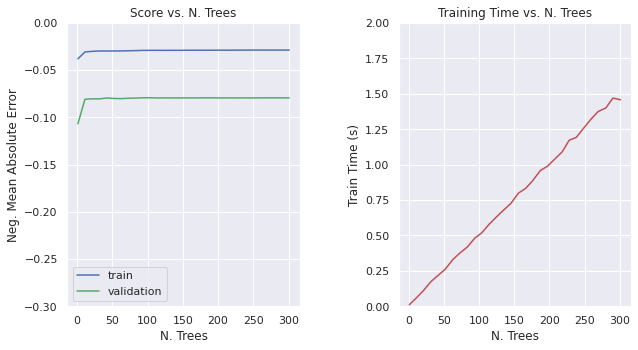

In [92]:
plot_curves(tree_grid_search)

In [93]:
# Define a grid over only the maximum number of features
depth_grid = {'max_depth': [int(x) for x in np.linspace(1, 101, 10)]}

kf = KFold(n_splits=3, random_state=0, shuffle=True)

# Create the grid search model and fit to the training data
depth_grid_search = GridSearchCV(final_model, param_grid=depth_grid, verbose = 2, n_jobs=-1, cv = kf,
                                scoring="neg_mean_absolute_error", return_train_score=True)
depth_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=RandomForestRegressor(max_depth=20, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [1, 12, 23, 34, 45, 56, 67, 78, 89, 101]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=2)

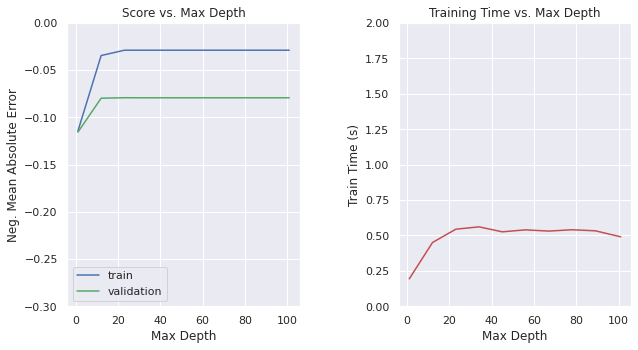

In [94]:
plot_curves(depth_grid_search, param='max_depth', name = 'Max Depth')

The final best model according to the parameter tuning phase can be found in the "final_model" variable.

Evaluate the feature importances for the final model considered.

In [95]:
final_model.feature_importances_

array([0.22235301, 0.13478108, 0.07637128, 0.06159174, 0.12338524,
       0.0046533 , 0.00965467, 0.00299306, 0.09179174, 0.01341523,
       0.        , 0.01733794, 0.01343623, 0.01563106, 0.02015262,
       0.02343892, 0.0137786 , 0.01554632, 0.01386116, 0.00978113,
       0.01481922, 0.01222132, 0.00823406, 0.00500748, 0.00837959,
       0.00808933, 0.00620305, 0.01074544, 0.00682188, 0.01238214,
       0.01367884, 0.00759038, 0.00187294])

In [96]:
feature_names = [str(i) for i in list(X.columns)]

Text(0.5, 0, 'Random Forest Feature Importance')

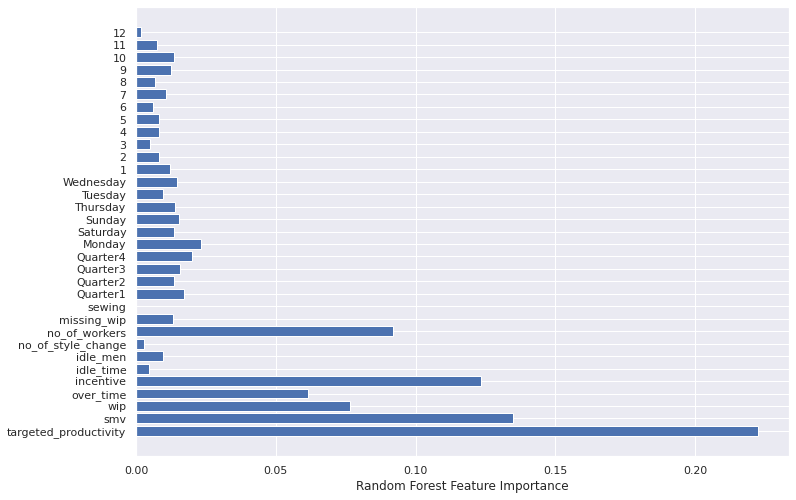

In [97]:
plt.barh(feature_names, final_model.feature_importances_)
plt.xlabel("Random Forest Feature Importance")

In [100]:
from sklearn.metrics import mean_absolute_error
prediction_test = final_model.predict(X_test)
mean_absolute_error(y_test, prediction_test)

0.08131885635114312

In [101]:
rf_2 = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=0)
retrained_model = rf_2.fit(X_train, y_train)
prediction_test = retrained_model.predict(X_test)
mean_absolute_error(y_test, prediction_test)

0.08131885635114312